In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import pylab as pl
import statsmodels.formula.api as smf
pl.style.use('fivethirtyeight')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pop = pd.read_csv('R11066861_SL380.csv')
pop = pop[1:]

In [3]:
pop['fips_int'] = pop.FIPS.astype(int)
pop.head()

,Area Name-Legal/Statistical Area Description,Qualifying Name,Area (Land),Area (Water),Summary Level,Geographic Component,Region,Division,FIPS,Metropolitan Statistical Area/Consolidated Metropolitan Statistical Area,Total Population,Total Population.1,Population Density (per sq. mile),Area (Land).1,Area Total,Area (Land).2,Area (Water).1,fips_int
1,"Abilene, TX MSA","Abilene, TX MSA",2371459979,9391045,380,00,NaN,NaN,0040,0040,126555,126555,138.2169,915.625900969425,919.2518,915.6259,3.625903,40
2,"Aguadilla, PR MSA","Aguadilla, PR MSA",305113105,138808893,380,00,NaN,NaN,0060,0060,146424,146424,1242.937,117.80483925022,171.3993,117.8048,53.59442,60
3,"Albany, GA MSA","Albany, GA MSA",1775097456,29211693,380,00,NaN,NaN,0120,0120,120822,120822,176.2875,685.368994759821,696.6477,685.369,11.2787,120
4,"Albany--Schenectady--Troy, NY MSA","Albany--Schenectady--Troy, NY MSA",8345443765,172031486,380,00,NaN,NaN,0160,0160,875583,875583,271.735,3222.19401788734,3288.616,3222.194,66.42173,160
5,"Albuquerque, NM MSA","Albuquerque, NM MSA",15392298114,21190272,380,00,NaN,NaN,0200,0200,712738,712738,119.929,5942.99972972848,5951.181,5943,8.18161,200


In [4]:
total_em_county = pd.read_csv('State_County/CountiesBySector.csv')

In [5]:
total_em_county.head()

,State,County,FIPS,Total,Unnamed: 4,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad
0,AL,Autauga,1001,0.256167,NaN,0.003001,0.004434,0.010148,0.155508,0.074761,0,0.000976,0.002453,0.004886
1,AL,Baldwin,1003,0.450031,NaN,0.015348,0.011884,0.031948,0.000000,0.278709,0,0.017842,0.044849,0.049451
2,AL,Barbour,1005,0.099370,NaN,0.001905,0.008555,0.006284,0.000000,0.057143,0,0.005469,0.013747,0.006268
3,AL,Bibb,1007,0.045945,NaN,0.000769,0.001622,0.004614,0.000000,0.035746,0,0.000380,0.000956,0.001858
4,AL,Blount,1009,0.114776,NaN,0.001951,0.009059,0.011162,0.000000,0.087401,0,0.000298,0.000749,0.004155


In [6]:
crosswalk_2000_MSA = pd.read_csv('crosswalk_2000_MSA.csv')
crosswalk_2000_counties = pd.read_csv('crosswalk_2000_counties.csv')

In [7]:
total_em_county[total_em_county[' FIPS'] == 72099]

,State,County,FIPS,Total,Unnamed: 4,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad


In [8]:
# total_em_county[total_em_county[' FIPS'] == nan]
# total_em_county.dropna()

In [9]:
crosswalk_2000_counties[(crosswalk_2000_counties['MSA/CMSA FIPS'] == 60)]

,MSA/CMSA FIPS,County FIPS,MSA
1,60,72003,Aguada Municipio
2,60,72005,Aguadilla Municipio
3,60,72099,Moca Municipio


In [10]:
def match(fips):
    if len(crosswalk_2000_counties[(crosswalk_2000_counties['County FIPS'] == fips)]['MSA/CMSA FIPS']) !=0:
        return crosswalk_2000_counties[(crosswalk_2000_counties['County FIPS'] == fips)]['MSA/CMSA FIPS'].values[0]
    else:
        return np.nan

In [11]:
# total_em_county.loc[3141]

In [12]:
total_em_county[[' FIPS']].apply(lambda x: match(x[0]), axis=1)

0       5240
1       5160
2        NaN
3        NaN
4       1000
5        NaN
6        NaN
7        450
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16      2650
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22      2180
23       NaN
24       NaN
25      5240
26       NaN
27      2880
28       NaN
29       NaN
        ... 
3111     NaN
3112    5082
3113    5082
3114     NaN
3115     NaN
3116     460
3117     NaN
3118     NaN
3119     NaN
3120     NaN
3121     NaN
3122     NaN
3123     NaN
3124     NaN
3125     NaN
3126     NaN
3127     NaN
3128    1580
3129     NaN
3130    1350
3131     NaN
3132     NaN
3133     NaN
3134     NaN
3135     NaN
3136     NaN
3137     NaN
3138     NaN
3139     NaN
3140     NaN
dtype: float64

In [13]:
total_em_county['MSA/CMSA FIPS'] = total_em_county[[' FIPS']].apply(lambda x: match(x[0]), axis=1)
total_em_county.head()

,State,County,FIPS,Total,Unnamed: 4,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad,MSA/CMSA FIPS
0,AL,Autauga,1001,0.256167,NaN,0.003001,0.004434,0.010148,0.155508,0.074761,0,0.000976,0.002453,0.004886,5240
1,AL,Baldwin,1003,0.450031,NaN,0.015348,0.011884,0.031948,0.000000,0.278709,0,0.017842,0.044849,0.049451,5160
2,AL,Barbour,1005,0.099370,NaN,0.001905,0.008555,0.006284,0.000000,0.057143,0,0.005469,0.013747,0.006268,NaN
3,AL,Bibb,1007,0.045945,NaN,0.000769,0.001622,0.004614,0.000000,0.035746,0,0.000380,0.000956,0.001858,NaN
4,AL,Blount,1009,0.114776,NaN,0.001951,0.009059,0.011162,0.000000,0.087401,0,0.000298,0.000749,0.004155,1000


In [14]:
total_em_county.to_csv('vulcan_county.csv')

In [15]:
total_em_county[(total_em_county['MSA/CMSA FIPS'] == 60)]

,State,County,FIPS,Total,Unnamed: 4,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad,MSA/CMSA FIPS


In [16]:
total_em_msa = total_em_county.groupby(['MSA/CMSA FIPS']).sum()
total_em_msa['MSAFIPS'] = total_em_msa.index
total_em_msa = total_em_msa.reset_index()
total_em_msa.head()


,MSA/CMSA FIPS,FIPS,Total,Unnamed: 4,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad,MSAFIPS
0,40,48441,0.382555,NaN,0.022338,0.015469,0.027425,0.000000,0.249408,0.000000,0.015101,0.037960,0.014855,40
1,120,26272,0.849188,NaN,0.014966,0.423332,0.016791,0.184750,0.169383,0.000000,0.007027,0.017663,0.015276,120
2,160,216420,3.002046,NaN,0.226240,0.190203,0.464706,0.264052,1.363584,0.238136,0.043270,0.108768,0.103087,160
3,200,105105,2.141536,NaN,0.166847,0.103907,0.276234,0.209940,1.030404,0.040301,0.064095,0.161114,0.088695,200
4,220,22079,1.561100,NaN,0.014420,0.123136,0.024119,1.081273,0.263871,0.000000,0.011238,0.028250,0.014791,220


In [17]:
def match2(fips, key):
    m = total_em_msa[(total_em_msa['MSAFIPS'] == fips)] 
    if len(m) !=0:
        return m[key].values[0]
    else:
        return np.nan

In [18]:
pop.columns

Index([u'Area Name-Legal/Statistical Area Description', u'Qualifying Name',
       u'Area (Land)', u'Area (Water)', u'Summary Level',
       u'Geographic Component', u'Region', u'Division', u'FIPS',
       u'Metropolitan Statistical Area/Consolidated Metropolitan Statistical Area',
       u'Total Population', u'Total Population.1',
       u'Population Density (per sq. mile)', u'Area (Land).1', u'Area Total',
       u'Area (Land).2', u'Area (Water).1', u'fips_int'],
      dtype='object')

In [19]:
total_em_msa.columns

Index([u'MSA/CMSA FIPS', u' FIPS', u' Total', u'Unnamed: 4', u'Commercial',
       u'Industrial', u'Residential', u'Electricity Prod', u'Onroad',
       u'Cement', u'Aircraft', u'Airborne', u'Nonroad', u'MSAFIPS'],
      dtype='object')

In [20]:
pop['TotalEmission'] = pop[['fips_int']].apply(lambda x: match2(x[0], ' Total'), axis=1)
pop['Commercial'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Commercial'), axis=1)
pop['Residential'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Residential'), axis=1)
pop['ElectricityProd'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Electricity Prod'), axis=1)
pop['Onroad'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Onroad'), axis=1)
pop['Cement'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Cement'), axis=1)
pop['Industrial'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Industrial'), axis=1)
pop['Aircraft'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Aircraft'), axis=1)
pop['Airborne'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Airborne'), axis=1)
pop['Nonroad'] = pop[['fips_int']].apply(lambda x: match2(x[0], 'Nonroad'), axis=1)


In [21]:
pop = pop.rename(columns={'Total Population': 'TotalPop', 'Area (Land)' : 'AreaLand', 'Population Density (per sq. mile)': 'PopDensity'})
pop['TotalPop'] = pop['TotalPop'].astype(int)
pop['PopDensity'] = pop['PopDensity'].astype(float)

In [22]:
popMSA = pop[pop.TotalPop >= 100000]
# popMSA.dropna()
popMSA.describe()

,TotalPop,PopDensity,fips_int,TotalEmission,Commercial,Residential,ElectricityProd,Onroad,Cement,Industrial,Aircraft,Airborne,Nonroad
count,260.000000,260.000000,260.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,874952.373077,305.762486,4449.357692,3.944114,0.207351,0.316970,1.203058,1.145232,0.031943,0.721711,0.054378,0.138450,0.125021
std,2020946.129315,280.074243,2679.594631,6.857424,0.504692,0.940551,2.120263,2.199982,0.107978,1.672366,0.116705,0.294448,0.238060
min,101541.000000,5.412178,40.000000,0.248845,0.007496,0.002914,0.000000,0.132435,0.000000,0.003531,0.000000,0.000000,0.008906
25%,158147.000000,135.559975,2151.500000,0.712167,0.031261,0.040589,0.006238,0.249838,0.000000,0.070097,0.010819,0.027196,0.026296
50%,307042.000000,211.651850,4020.000000,1.575079,0.058566,0.082379,0.262810,0.440709,0.000000,0.197390,0.019333,0.048598,0.049411
75%,643879.750000,369.044875,6825.000000,4.124743,0.155998,0.217929,1.373163,0.904127,0.000000,0.547314,0.043520,0.109397,0.103296
max,21199865.000000,2028.722000,9360.000000,52.933760,5.787252,11.301641,11.425854,18.860469,0.861166,13.410501,1.166637,2.932557,2.093057


In [24]:
popMSA['ComResOnRoad'] = popMSA.Commercial + popMSA.Residential + popMSA.Onroad

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
popMSA[~isnan(popMSA['ComResOnRoad'])]['TotalPop']

1       126555
3       120822
4       875583
5       712738
6       126337
7       637958
8       129144
9       217858
10      260283
11      112249
12      358365
13      225965
14      153444
15     4112198
16      115092
17      477441
18     1249763
19      661645
21      162582
22      602894
23      385090
24      166814
25      162453
26      129352
27      363988
28      252320
29      921106
31      120563
32      150433
33      432345
        ...   
250     563598
251     104646
252     732117
253     284539
254    2395997
255     149192
256     129749
257     618203
258     169871
259     843746
260     803235
261     164875
262     174706
263     299896
265     368021
266     213517
267    7608070
268     128012
269     125834
270    1131184
271     153172
272     545220
273     140518
274     120044
275     233450
276     222581
277     381751
278     594746
279     139149
280     160026
Name: TotalPop, dtype: int32

                            OLS Regression Results                            
Dep. Variable:      log(ComResOnRoad)   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     6147.
Date:                Wed, 18 Nov 2015   Prob (F-statistic):          5.32e-180
Time:                        07:28:05   Log-Likelihood:                 35.890
No. Observations:                 256   AIC:                            -67.78
Df Residuals:                     254   BIC:                            -60.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -12.5036      0.157    -79.780

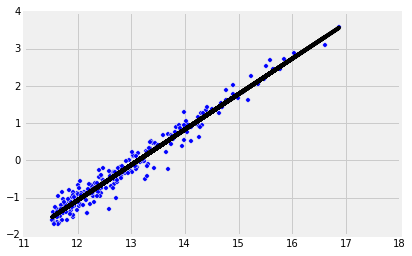

In [26]:
model = smf.ols(formula = 'log(ComResOnRoad)  ~ log(TotalPop)', data=popMSA).fit()
print(model.summary())
pl.scatter(log(popMSA.TotalPop), log(popMSA.ComResOnRoad))
pl.plot(log(popMSA[~isnan(popMSA['ComResOnRoad'])]['TotalPop']), model.predict(), 'k')

In [27]:
pop.columns

Index([u'Area Name-Legal/Statistical Area Description', u'Qualifying Name',
       u'AreaLand', u'Area (Water)', u'Summary Level', u'Geographic Component',
       u'Region', u'Division', u'FIPS',
       u'Metropolitan Statistical Area/Consolidated Metropolitan Statistical Area',
       u'TotalPop', u'Total Population.1', u'PopDensity', u'Area (Land).1',
       u'Area Total', u'Area (Land).2', u'Area (Water).1', u'fips_int',
       u'TotalEmission', u'Commercial', u'Residential', u'ElectricityProd',
       u'Onroad', u'Cement', u'Industrial', u'Aircraft', u'Airborne',
       u'Nonroad'],
      dtype='object')

In [28]:
from scipy import stats
popMSA2 = popMSA[(np.abs(stats.zscore(popMSA.PopDensity)) < 3)]

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

                            OLS Regression Results                            
Dep. Variable:      log(ComResOnRoad)   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 18 Nov 2015   Prob (F-statistic):           1.21e-31
Time:                        07:28:30   Log-Likelihood:                -307.99
No. Observations:                 256   AIC:                             620.0
Df Residuals:                     254   BIC:                             627.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -5.0243      0.357    -

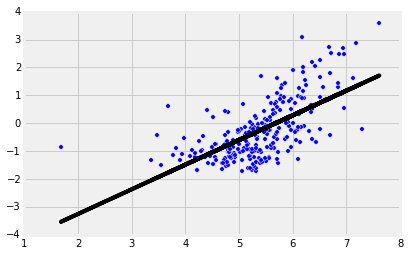

In [32]:
model2 = smf.ols(formula = 'log(ComResOnRoad)  ~ log(PopDensity)', data=popMSA).fit()
print(model2.summary())
pl.scatter(log(popMSA.PopDensity), log(popMSA.ComResOnRoad))
pl.plot(log(popMSA[~isnan(popMSA['ComResOnRoad'])]['PopDensity']), model2.predict(), 'k')

In [34]:
popMSA['perCapitaEm'] = popMSA.TotalEmission*1000000/popMSA['TotalPop']

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
popMSA.columns

Index([u'Area Name-Legal/Statistical Area Description', u'Qualifying Name',
       u'AreaLand', u'Area (Water)', u'Summary Level', u'Geographic Component',
       u'Region', u'Division', u'FIPS',
       u'Metropolitan Statistical Area/Consolidated Metropolitan Statistical Area',
       u'TotalPop', u'Total Population.1', u'PopDensity', u'Area (Land).1',
       u'Area Total', u'Area (Land).2', u'Area (Water).1', u'fips_int',
       u'TotalEmission', u'Commercial', u'Residential', u'ElectricityProd',
       u'Onroad', u'Cement', u'Industrial', u'Aircraft', u'Airborne',
       u'Nonroad', u'ComResOnRoad', u'perCapitaEm'],
      dtype='object')

In [ ]:
# help(pd.DataFrame.sort)

In [36]:
sortedpop = popMSA.sort(['perCapitaEm'], ascending=[0])

In [37]:
sortedpop[['Qualifying Name', 'TotalEmission', 'perCapitaEm']]

,Qualifying Name,TotalEmission,perCapitaEm
249,"Steubenville--Weirton, OH--WV MSA",6.722961,50.928439
87,"Flagstaff, AZ--UT MSA",5.670588,46.341205
139,"Lake Charles, LA MSA",5.848485,31.858486
173,"Monroe, LA MSA",4.119479,27.976086
271,"Wheeling, WV--OH MSA",4.088966,26.695257
255,"Terre Haute, IN MSA",3.850022,25.805818
241,"Sioux City, IA--NE MSA",3.114862,25.093549
89,"Florence, SC MSA",3.131559,24.900872
44,"Charleston, WV MSA",5.923797,23.538702
190,"Parkersburg--Marietta, WV--OH MSA",3.111658,20.574711


In [39]:
sortedpop.to_csv('vulcan.csv')

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)


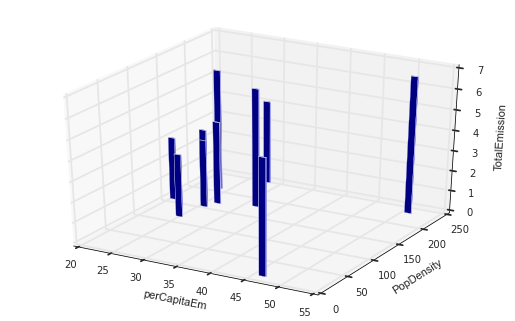

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = (sortedpop['perCapitaEm'][:10].values).tolist()
ypos = (sortedpop['PopDensity'][:10].values).tolist()
num_elements = len(xpos)
zpos = [0,0,0,0,0,0,0,0,0,0]
dx = np.ones(10)
dy = np.ones(10)
dz = sortedpop['TotalEmission'][:10].values.tolist()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

ax.set_xlabel('perCapitaEm')
ax.set_ylabel('PopDensity')
ax.set_zlabel('TotalEmission')

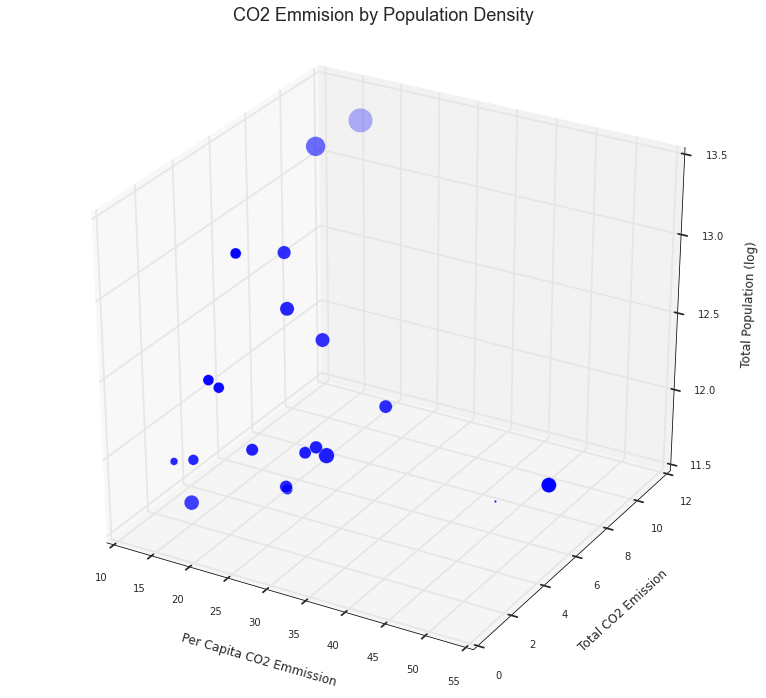

In [176]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
n=20
x =(sortedpop['perCapitaEm'][:n].values).tolist()
y =(sortedpop['TotalEmission'][:n].values).tolist()
z =np.log(sortedpop['TotalPop'][:n].values).tolist()
s =(sortedpop['PopDensity'][:n].values).tolist()


ax.scatter(x, y, z, c='b', marker='o', s=s)

ax.set_xlabel('Per Capita CO2 Emmission', size=12)
ax.set_ylabel('Total CO2 Emission', size=12)
ax.set_zlabel('Total Population (log)', size=12)
ax.set_title('CO2 Emmision by Population Density', size=18, rotation=0, y=1.08)

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
from mpl_toolkits.mplot3d import proj3d

circ = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)

# ax.legend("Population Density", loc='lower right')
# handles, labels = ax.get_legend_handles_labels()
# ax.legend()

# x2, y2, _ = proj3d.proj_transform(20,1,12, ax.get_proj())
# label = plt.annotate(
#     "this", 
#     xy = (x2, y2), xytext = (5, 10),
#     arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.savefig("EmmissionPlot.png")